# The Sparks Foundation

## Domain - Data Science and Business Analytics
## Batch - November 2021
### By - Deep Ranjan Guha


      Copyright  Deep Ranjan Guha,2021

#### Task 1 - Predict the percentage of a student based on the Learning hours.
#### Dataset - http://bit.ly/w-data 

In [206]:
# Importing the required libraries:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error

#### Reading the dataset:

In [143]:
# Reading the dataset:
link="http://bit.ly/w-data"
data=pd.read_csv(link)
print('The imported dataset : ')
data.head(10)

The imported dataset : 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [177]:
data.info()
print('\n',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes

 (25, 2)


* The no of records : 25
* The no of attributes : 2

In [169]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


* ``Scores`` has a mean valiue which is slightly greater than its median value which indicates that it has postive skewness.

#### Visualisation of Spread and Distribution of data:

Spread of data : 


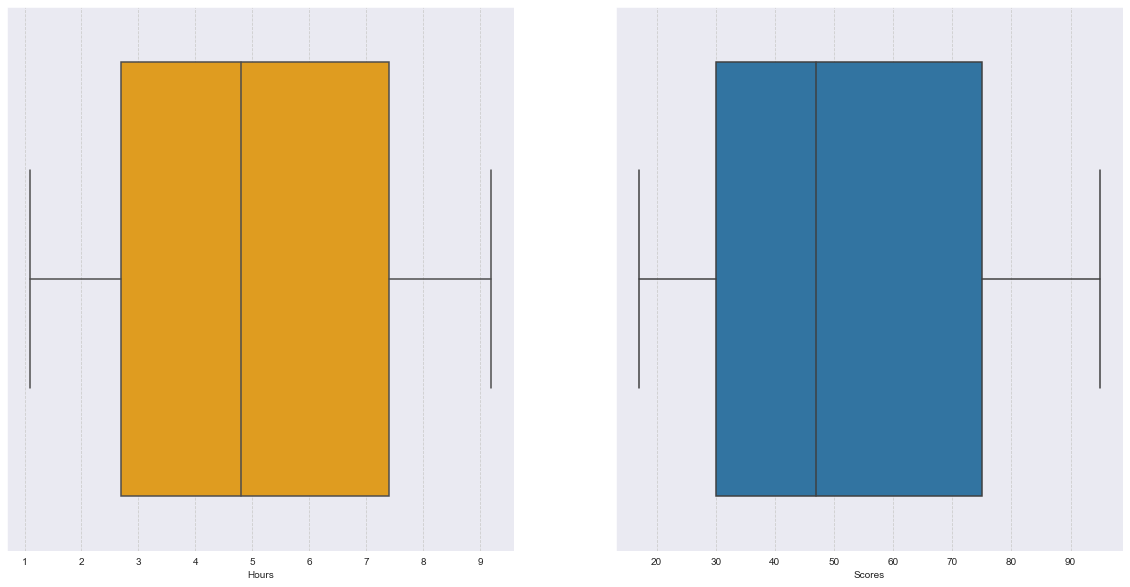



Distribution of data : 


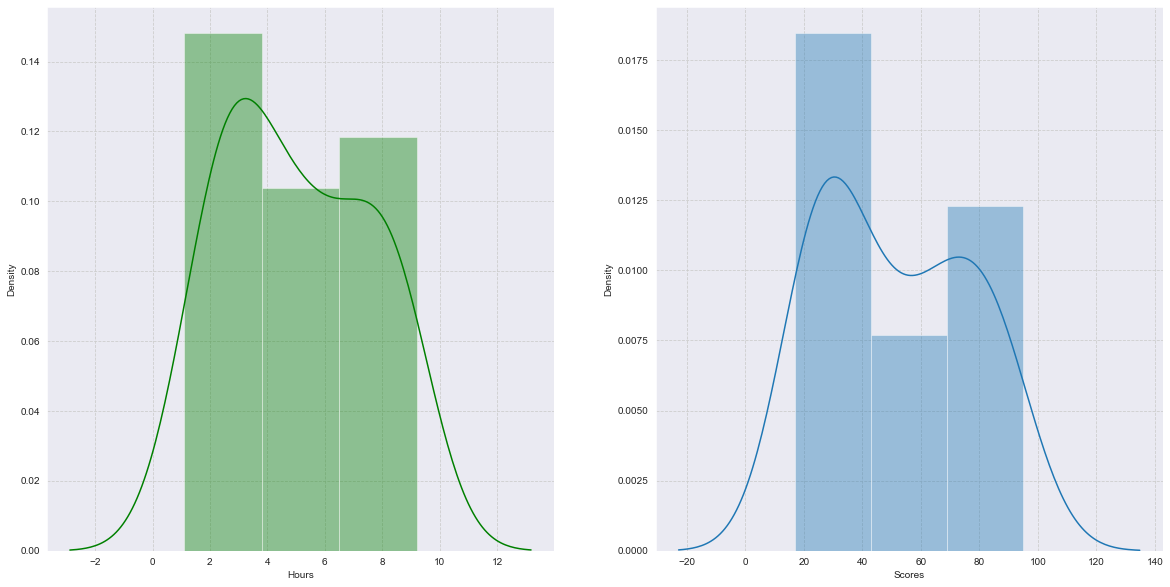

In [208]:
plt.rcParams['figure.figsize']=(20,10)
print('Spread of data : ')
fig,axes1=plt.subplots(1,2)
sns.boxplot(x=data['Hours'],ax=axes1[0],color='orange')
sns.boxplot(x=data['Scores'],ax=axes1[1])
plt.show()
print('\n')
plt.rcParams['figure.figsize']=(20,10)
print('Distribution of data : ')
fig,axes2=plt.subplots(1,2)
sns.distplot(data['Hours'],ax=axes2[0],color='green')
sns.distplot(data['Scores'],ax=axes2[1])
plt.show()

I will further use plots to understand and visualise the data and figure out the relationship exhibited by the feartures ``Hours`` and ``Scores``.
Since both the features are numerical I will plot a 2-D scatterplot to understand the relationship between them.

#### Data Visualisation:

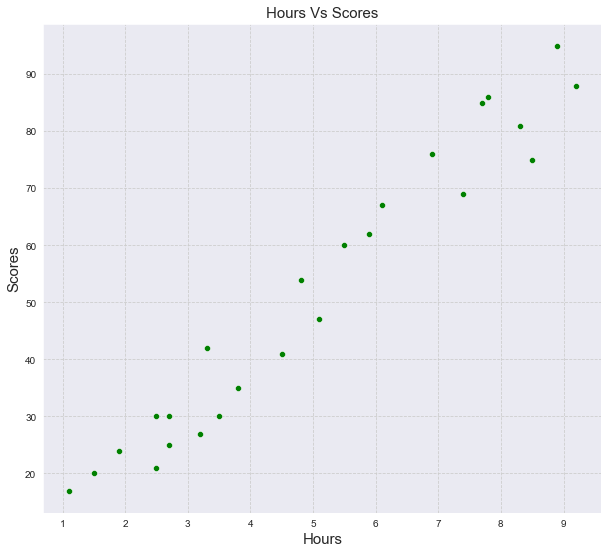

In [170]:
plt.figure(figsize=(10,9))
sns.set_style('darkgrid',{"grid.color": ".8","grid.linestyle": "--"})
sns.scatterplot(x=data['Hours'],y=data['Scores'],data=data,color='g')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours Vs Scores',fontsize=15)
plt.show() 

From the above Scatterplot, it can be clearly concluded that their is a positive linear relationship between the hours studied and the percentage obtained by the students.

#### Checking the presence of Null/Missing Values:

In [171]:
count=data.isna().sum()
percent=((count/data.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
Hours,0,0.0
Scores,0,0.0


Thus from the above dataframe we can conclude that there are no missing records in the datset.

#### Data Preparation:

I will further segregate the features into Predictor(Independent) variables and Target(dependent) variables.

In [147]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
print('Independent feature (Hours) : ',X,'\n')
print('Target feature (Scores) : ',y)

Independent feature (Hours) :  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] 

Target feature (Scores) :  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Splitting the dataset into Train data and Test data in the ratio 80:20

I will do this by using Scikit-Learn's built-in train_test_split() method:

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('Checking the shape of the train and test set : ')
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

Checking the shape of the train and test set : 
X_train :  (20, 1)
X_test :  (5, 1)
y_train :  (20,)
y_test :  (5,)


#### Training the base model:

After splitting the data I will further fit a base Linear Regression model and train the algorithm using the train dataset.

In [205]:
lin_reg=model
base_model=lin_reg.fit(X_train,y_train)
print(base_model)
print('Training has been completed.')

LinearRegression()
Training has been completed.


#### Checking the model accuracy:

In [166]:
r2_train=base_model.score(X_train,y_train)
print('R2 for the train data : ',np.round(r2_train*100,2),'%')

R2 for the train data :  95.16 %


In [165]:
r2_test=base_model.score(X_test,y_test)
print('R2 for the test data : ',np.round(r2_test*100,2),'%')

R2 for the test data :  94.55 %


Thus the model has an Accuracy(R2) of 94.59% on the test data with minimal overfitting on training dataset.

#### Plotting the regression line:

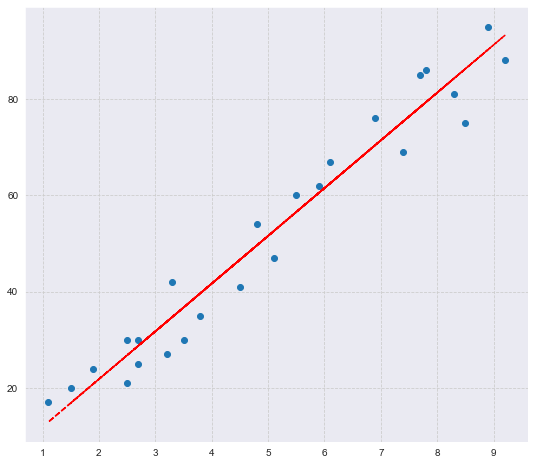

In [152]:
reg_line=base_model.intercept_+base_model.coef_*X
plt.figure(figsize=(9,8))
plt.scatter(x=X,y=y)
plt.plot(X,reg_line,'r--')
plt.show()

#### Predicting the scores:

In [153]:
y_pred=base_model.predict(X_test)  # Predicting the scores
comparison_dataframe=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparison_dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Prediction with sample test data

In [173]:
hours=9.25
y_predsample=base_model.predict([[hours]])
print('Hours of study per day : ',9.25)
print('The percentage obtained by the student : ',y_predsample[0])

Hours of study per day :  9.25
The percentage obtained by the student :  93.69173248737538


#### Model Evaluation

I will evaluate the model performance based on the Mean absolute error.

In [156]:
mae_train=mean_absolute_error(y_train,base_model.predict(X_train))
print('Mean Absolute Error for train data : ',mae_train,'\n')
mae_test=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error for test data :',mae_test) 

Mean Absolute Error for train data :  5.186601709180368 

Mean Absolute Error for test data : 4.183859899002975
